In [1]:
import numpy as np
import matplotlib.pyplot as plt
from random import randint
from tqdm import tqdm 

In [2]:
J = -1
B = 2.

In [3]:
# Definiendo el array inicial

def random_spin_field(N,M):
    return np.random.choice([-1,1], size=(N,M))

In [55]:
N = 20
M = 20
sigma = random_spin_field(N,M)
print(sigma)

[[-1 -1  1  1 -1 -1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1 -1  1]
 [ 1 -1  1 -1  1  1  1  1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1]
 [-1 -1  1 -1 -1  1  1  1 -1 -1  1  1  1  1  1 -1 -1  1  1 -1]
 [-1  1  1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1]
 [-1 -1  1  1  1 -1 -1  1  1 -1  1  1 -1 -1  1  1  1  1  1  1]
 [ 1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1]
 [ 1  1  1  1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1]
 [-1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1  1  1 -1  1 -1 -1]
 [ 1  1 -1 -1 -1 -1 -1 -1  1  1  1 -1 -1 -1  1  1 -1  1 -1 -1]
 [ 1  1  1  1  1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1 -1 -1]
 [ 1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1  1 -1  1  1  1]
 [-1 -1  1  1 -1  1 -1 -1  1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1]
 [-1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1  1  1  1 -1 -1  1]
 [-1 -1 -1  1  1 -1  1  1 -1  1 -1  1  1  1  1 -1  1  1  1 -1]
 [-1 -1 -1 -1 -1  1 -1  1 -1 -1  1 -1  1 -1 -1 -1 -1  1 -1 -1]
 [ 1  1 -1 -1  1  1  1 -1 -1  1 -1  1 -1  1 -1 -1 -1  1

In [56]:
def GetEnergy(sigma):
    
    n = sigma.shape[0]
    m = sigma.shape[1]
    
    energy = 0.
     
    for i in range(n):
        for j in range(m):
            
            right = i+1
            if i == n-1:
                right = 0
                
            left = i-1
           
            up = j+1
            if j == m-1:
                up = 0
                
            down = j-1
            
            energy += 0.5*J*sigma[i,j]*\
            (sigma[right,j]+sigma[left,j]+sigma[i,up]+sigma[i,down])
    
    return energy

In [57]:
def GetMagnetization(sigma):
    return np.sum(sigma.ravel())/float(M*N)

In [58]:
print(GetEnergy(sigma), GetMagnetization(sigma))

(-52.0, -0.06)


In [59]:
# Implementamos metropolis

def _ising_step(sigma, T):
    
    beta = 1./T
    
    current = sigma.copy()
    energy1 = GetEnergy(current)
    
    # Calcular una posición en el array
    x = randint(0,sigma.shape[0]-1)
    y = randint(0,sigma.shape[1]-1)
    
    future = current.copy()
    future[x,y] = current[x,y]*(-1)
    
    energy2 = GetEnergy(future)
    
    dE = energy2-energy1
    
    r =  np.random.rand()   
    
    if dE < 0.:
        return future
        
    elif r < np.exp(- dE * beta):
        return future
    
    else:
        return current

In [60]:
Energy = []
Energy2 = []
Magnetization = []

T = 2.2
Ntoys = 40000

sigma_ = sigma.copy()

for i in tqdm(range(Ntoys)):
    sigma_ = _ising_step(sigma_,T)
    
    if i > 20000:
        energy = GetEnergy(sigma_)
        magnetization = GetMagnetization(sigma_)
        Energy.append(energy)
        Energy2.append(energy**2)
        Magnetization.append(magnetization)

100%|██████████| 40000/40000 [00:59<00:00, 666.80it/s]


In [64]:
e = np.average(Energy)/float(M*N)
e2 = np.average(Energy2)/float((M*N)**2)
m = np.average(Magnetization)

cv = (e2 - e**2)/(T**2)

print(e,e2,cv,m)

(-1.4085544277213862, 1.9938869943497175, 0.0020374831603710364, 0.612439621981099)


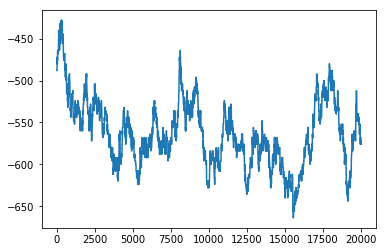

In [65]:
plt.figure()
plt.plot(Energy)

(array([ 148., 1515., 2638., 5159., 4039., 3714., 1785.,  485.,  278.,
         238.]),
 array([-664. , -640.4, -616.8, -593.2, -569.6, -546. , -522.4, -498.8,
        -475.2, -451.6, -428. ]),
 <a list of 10 Patch objects>)

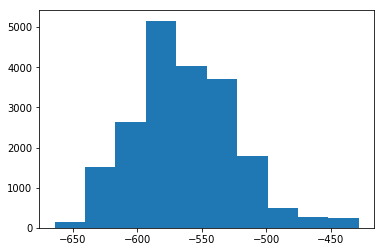

In [66]:
plt.figure()
plt.hist(Energy, bins=10)

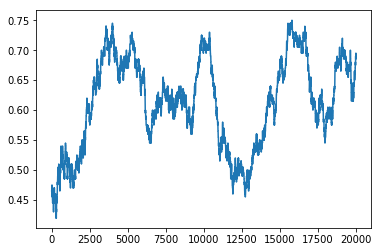

In [67]:
plt.figure()
plt.plot(Magnetization)

(array([ 181.,  921., 1958., 1993., 1385., 3573., 2827., 2763., 3143.,
        1255.]),
 array([0.42 , 0.453, 0.486, 0.519, 0.552, 0.585, 0.618, 0.651, 0.684,
        0.717, 0.75 ]),
 <a list of 10 Patch objects>)

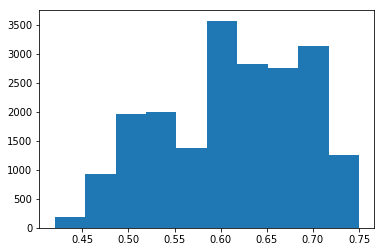

In [69]:
plt.figure()
plt.hist(Magnetization, bins=10)

In [42]:
# Calculando calor espeficico

cv = (np.average(Energy2)-np.average(Energy)**2)/T**2

print(np.average(Energy),np.average(Magnetization),cv)

(-1334.299664686158, -0.37234454967939296, 1165.231857441456)


In [ ]:
# Ahora vamos a variar las temperaturas

def GetValues(T, Ntoys = 2000):
    
    sigma_ = sigma.copy()
    
    Energy = []
    Energy2 = []
    Magnetization = []
    
    for i in range(Ntoys):
    #for i in tqdm(range(Ntoys)):
        sigma_ = _ising_step(sigma_,T)
        energy = GetEnergy(sigma_)
        magnetization = GetMagnetization(sigma_)
    
        Energy.append(energy/float(M*N))
        Energy2.append((energy/float(M*N))**2)
        Magnetization.append(magnetization)
        
    cv = (np.average(Energy2)-np.average(Energy)**2)/T**2
    
    return np.average(Energy),np.average(Magnetization),cv    

In [ ]:
T = np.arange(1.0,3.0,0.1)

Energy = np.zeros(len(T))
Mag = np.zeros(len(T))
Cv = np.zeros(len(T))

for t in tqdm(range(len(T))):
    Energy[t], Mag[t], Cv[t] = GetValues(T[t])
    print(GetValues(T[t]))

In [ ]:
plt.plot(T,Energy)

In [ ]:
plt.plot(T,Mag)

In [ ]:
plt.plot(T,Cv)